### 1. For PTEN


#### Import all the necessary packages


In [625]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

%matplotlib inline

import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [626]:
X = pd.read_csv('trainReadyData/PTENX.csv')
X


,AKT1|207,BAD|572,BECN1|8678,CA9|768,CCND1|595,CDKN1B|1027,FTH1|2495,HIF1A|3091,IL6|3569,KLK3|354,MAP1LC3B|81631,MT2A|4502,MTOR|2475,PTGS2|5743,SLC2A1|6513,SLC30A1|7779,VEGFA|7422
0,11.671783,10.331095,10.330399,8.786293,11.123063,10.840378,15.024419,12.438820,3.467749,0.000000,11.760332,12.561393,10.611280,6.797676,11.905623,8.659774,12.723702
1,11.361381,10.131210,10.266701,11.680693,10.709868,9.026173,16.389493,13.119283,11.171136,0.000000,12.123821,15.306795,10.072728,10.378798,12.638665,8.692564,13.159528
2,12.262058,10.344795,10.195539,8.973686,11.079129,11.572258,15.032451,12.340602,6.207085,-0.244172,11.957079,11.650502,10.048771,7.186326,11.345759,7.359500,11.828677
3,11.995195,10.219912,10.333986,5.625884,11.137253,11.410401,14.232891,13.120130,6.027643,0.000000,11.471675,12.230678,10.717105,6.842500,11.735757,7.664320,11.604906
4,11.774395,11.011662,10.600298,10.208368,11.100662,10.846159,16.334449,12.128655,7.144285,0.000000,11.626989,13.323079,9.705211,7.297532,11.567655,8.639451,13.999798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,12.001832,10.449952,10.350913,7.023437,10.750616,10.626369,14.830816,11.978475,6.093245,0.000000,11.688075,12.098653,10.413475,5.969256,11.221073,7.700662,12.583022
137,11.891185,10.296958,10.565382,8.936019,9.494196,10.247973,14.773544,12.318858,5.642592,0.000000,11.652444,15.672665,10.246413,6.667682,12.738220,6.716592,12.943887
138,11.200209,10.683629,10.477150,8.178603,10.765598,11.322884,14.255659,10.943869,2.859671,0.000000,11.886304,12.760193,10.710462,5.817447,11.623525,8.041878,13.264488
139,12.258220,10.581927,10.184426,8.162077,11.163443,10.560895,14.469103,12.152434,2.819423,0.000000,11.358587,12.772848,10.804321,7.920966,11.505461,7.729521,13.638809


In [627]:
# Check if there is any missing values
X.isnull().sum()


AKT1|207          0
BAD|572           0
BECN1|8678        0
CA9|768           0
CCND1|595         0
CDKN1B|1027       0
FTH1|2495         0
HIF1A|3091        0
IL6|3569          0
KLK3|354          0
MAP1LC3B|81631    0
MT2A|4502         0
MTOR|2475         0
PTGS2|5743        0
SLC2A1|6513       0
SLC30A1|7779      0
VEGFA|7422        0
dtype: int64

In [628]:
y = pd.read_csv('trainReadyData/PTENy.csv')
y


,Class
0,0
1,1
2,0
3,0
4,0
...,...
136,1
137,0
138,0
139,1


In [629]:
y.value_counts()


Class
0        97
1        44
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

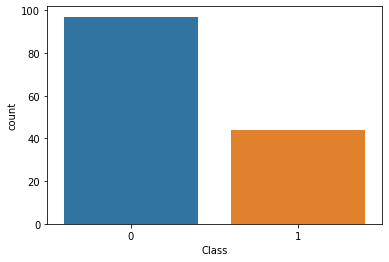

In [630]:
sns.countplot(y['Class'])


##### Creating three set of datas 1. Training Set 2. Validataion Set and 3. Testing Set

In [631]:
# Splitting Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.87, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9, random_state=1)


In [632]:
print("X Training Set     " + str(X_train.shape))
print("X Testing Set      " + str(X_test.shape))
print("X Validation Set   " + str(X_valid.shape))
print("y Training Set     " + str(y_train.shape))
print("y Testing Set      " + str(y_test.shape))
print("y Validation Set   " + str(y_valid.shape))

X Training Set     (109, 17)
X Testing Set      (19, 17)
X Validation Set   (13, 17)
y Training Set     (109, 1)
y Testing Set      (19, 1)
y Validation Set   (13, 1)


In [633]:
# Applying standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

# 1. Logistic Regression


In [634]:
logReg = LogisticRegression()

In [635]:
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

In [636]:
# Lets see how well our model performs
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Print Accuracy
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.25      0.20      0.22         5

    accuracy                           0.63        19
   macro avg       0.49      0.49      0.49        19
weighted avg       0.61      0.63      0.62        19

[[11  3]
 [ 4  1]]
0.631578947368421


### ROC Curve


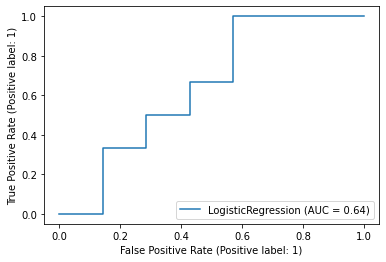

In [700]:
plot_roc_curve(logReg, X_valid, y_valid)


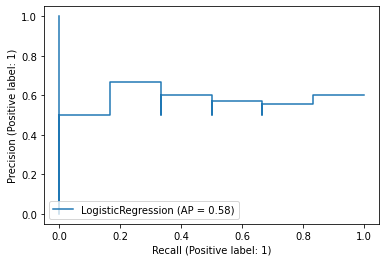

In [638]:
plot_precision_recall_curve(logReg, X_valid, y_valid)

### Confustion Matrix

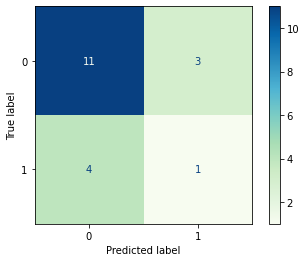

In [639]:
conf_mat = metrics.plot_confusion_matrix(logReg, X_test, y_test, cmap='GnBu')
print(conf_mat)

### Learning Curve


In [702]:
train_sizes, train_scores, validation_scores = learning_curve(
    logReg, X_train, y_train, train_sizes=np.logspace(-1, 0, 20))

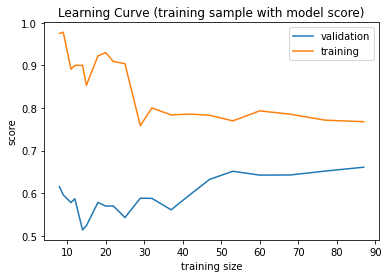

In [703]:
plt.plot(train_sizes, validation_scores.mean(axis=1), label='validation') 
plt.plot(train_sizes, train_scores.mean(axis=1), label='training')

plt.title("Learning Curve (training sample with model score)")
plt.xlabel('training size')
plt.ylabel('score')
plt.legend()
plt.show()

### Tuning Parameters

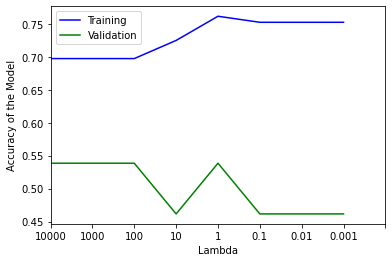

In [642]:
C_param_range = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]

train = []
validation = []
test = []

for i in C_param_range:
    # Apply logistic regression model to training data
    lr = LogisticRegression(C = i, random_state = 1)
    lr.fit(X_train,y_train)
    
    # Predict using model
    y_pred_train = lr.predict(X_train)
    y_pred_valid = lr.predict(X_valid)
    y_pred_test = lr.predict(X_test)
    
    # Saving accuracy score in table
    train.append(accuracy_score(y_train, y_pred_train))
    validation.append(accuracy_score(y_valid, y_pred_valid))
    test.append(accuracy_score(y_test, y_pred_test))


fig, ax = plt.subplots()
fig.canvas.draw()
plt.title("Lambda tuning with Accuracy of the model")
plt.xlabel("Lambda")
plt.ylabel("Accuracy of the Model")
plt.xlim(0,8)
plt.plot(np.array(train), color='blue', label='Training')
plt.plot(np.array(validation), color='green', label='Validation')
# plt.plot(np.array(test), color='red', label='Test')

plt.legend()
ax.set_xticklabels(['10000', '1000', '100', '10', '1', '0.1', '0.01', '0.001'])
plt.show()

In [643]:
grid={"C":[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], "penalty":['none', 'l1', 'l2', 'elasticnet'], 'solver':['newton-cg', 'lbfgs', 'liblinear']}

clf = GridSearchCV(logReg, param_grid=grid, cv=10, scoring='accuracy', verbose=True, n_jobs=-1)

best_clf = clf.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


In [644]:
print("tuned hpyerparameters :(best parameters) ",best_clf.best_params_)
print("accuracy :", best_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.6972727272727274


# 2. SVM Classifier


In [645]:
clf = svm.SVC()

clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)


In [646]:
# Lets see how well our model performs
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))


              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       0.00      0.00      0.00         5

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

[[14  0]
 [ 5  0]]


### Confusion Matrix

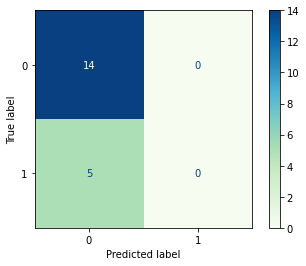

In [647]:
conf_mat = metrics.plot_confusion_matrix(clf, X_test, y_test, cmap='GnBu')
print(conf_mat)

### ROC Curve

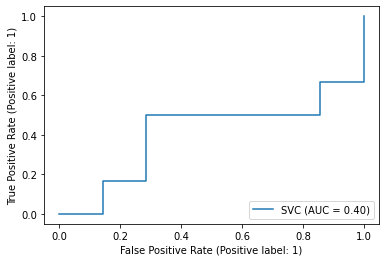

In [648]:
plot_roc_curve(clf, X_valid, y_valid)

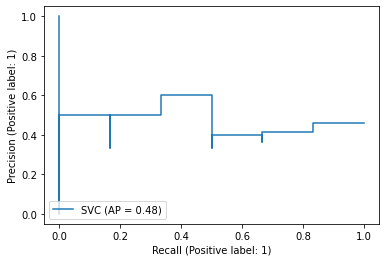

In [649]:
plot_precision_recall_curve(clf, X_valid, y_valid)

### Learning Curve

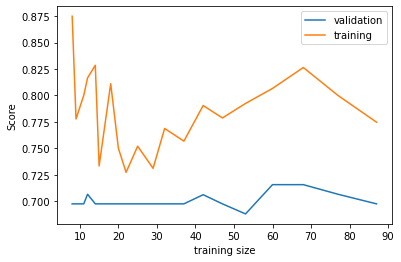

In [650]:
train_sizes, train_scores, validation_scores = learning_curve(clf, X_train, y_train, train_sizes=np.logspace(-1, 0, 20))

plt.plot(train_sizes, validation_scores.mean(axis=1), label='validation') 
plt.plot(train_sizes, train_scores.mean(axis=1), label='training') 

plt.title("Learning curve training sample with score of the model")
plt.xlabel('training size')
plt.ylabel('Score')
plt.legend()
plt.show()


In [651]:
print(accuracy_score(y_test, pred_clf))

0.7368421052631579


### Tuning Hyper Parameters

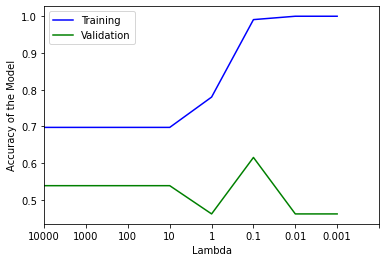

In [652]:
C_param_range = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]

train = []
validation = []
test = []

for i in C_param_range:
    # Apply logistic regression model to training data
    tempClf = svm.SVC(C = i, random_state = 1)
    tempClf.fit(X_train,y_train)
    
    # Predict using model
    y_pred_train = tempClf.predict(X_train)
    y_pred_valid = tempClf.predict(X_valid)
    y_pred_test = tempClf.predict(X_test)
    
    # Saving accuracy score in table
    train.append(accuracy_score(y_train, y_pred_train))
    validation.append(accuracy_score(y_valid, y_pred_valid))
    test.append(accuracy_score(y_test, y_pred_test))


fig, ax = plt.subplots()
fig.canvas.draw()
plt.title("Lambda tuning with Accuracy of the model")
plt.xlabel("Lambda")
plt.ylabel("Accuracy of the Model")
plt.xlim(0,8)
plt.plot(np.array(train), color='blue', label='Training')
plt.plot(np.array(validation), color='green', label='Validation')
# plt.plot(np.array(test), color='red', label='Test')
plt.legend()
ax.set_xticklabels(['10000', '1000', '100', '10', '1', '0.1', '0.01', '0.001'])
plt.show()

In [653]:
grid={"C":[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000], 'degree':[1, 2, 3, 4, 5, 6]}

new_clf = GridSearchCV(clf, param_grid=grid, cv=10, scoring='accuracy', verbose=True, n_jobs=-1)
best_clf = new_clf.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


In [654]:
print("tuned hpyerparameters :(best parameters) ",best_clf.best_params_)
print("accuracy :",best_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1e-05, 'degree': 1}
accuracy : 0.6972727272727274


# 3. Neural Network


In [708]:
mlpc = MLPClassifier(hidden_layer_sizes=(10, 20, 10), max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [709]:
# Lets see how well our model performs
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
print(accuracy_score(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.33      0.40      0.36         5

    accuracy                           0.63        19
   macro avg       0.55      0.56      0.55        19
weighted avg       0.65      0.63      0.64        19

[[10  4]
 [ 3  2]]
0.631578947368421


### Confusion Matrix

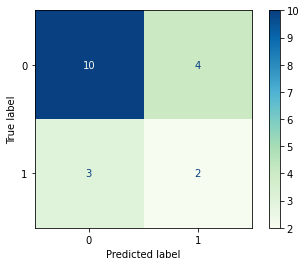

In [710]:
conf_mat = metrics.plot_confusion_matrix(mlpc, X_test, y_test, cmap='GnBu')
print(conf_mat)

### ROC AUC Curve

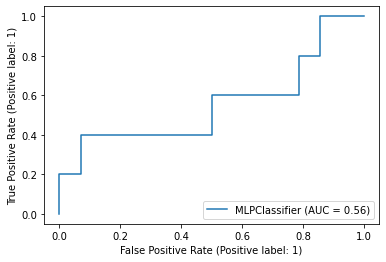

In [713]:
plot_roc_curve(mlpc, X_test, y_test)

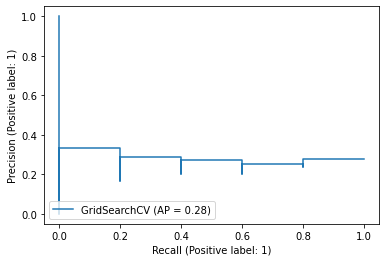

In [714]:
plot_precision_recall_curve(clf, X_test, y_test)

### Learning Curve

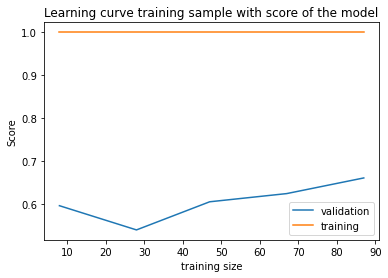

In [716]:
train_sizes, train_scores, validation_scores = learning_curve(mlpc, X_train, y_train)

plt.plot(train_sizes, validation_scores.mean(axis=1), label='validation') 
plt.plot(train_sizes, train_scores.mean(axis=1), label='training') 

plt.title("Learning curve training sample with score of the model")
plt.xlabel('training size')
plt.ylabel('Score')
plt.legend()
plt.show()

### Tuning Hyperparameters of Neural Network (MLPClassifier)

In [696]:
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(10,20,10),(20,15,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlpc, parameter_space, n_jobs=-1, cv=5, verbose=True)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(10, 20, 10),
                                     max_iter=500),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (10, 20, 10),
                                                (20, 15, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=True)

In [697]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 20, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [698]:
y_true, y_pred = y_test , clf.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))

Results on the test set:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        14
           1       0.00      0.00      0.00         5

    accuracy                           0.68        19
   macro avg       0.36      0.46      0.41        19
weighted avg       0.53      0.68      0.60        19

Accuracy: 0.6842105263157895
